In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/Wholesale customers data.csv'):
     for filename in filenames:
          print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
# Define a function to load the data
def load_data(path):
     try:
         df = pd.read_csv(path)
         print("Data loaded successfully!")
         return df
     except Exception as e:
           print(f"An error occurred: {e}")
           return None
# Path to the data file
path = '/content/Wholesale customers data.csv'
# Load the data
df = load_data(path)
# Display the first few rows of the DataFrame
print(df.head())


Data loaded successfully!
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
print("Column names:")
print(df.columns)

Column names:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [ ]:
# Print the data types of each column
print("Data types:")
print(df.dtypes)

Data types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
# Check for duplicates
print("Number of duplicate rows: ", df.duplicated().sum())

Descriptive Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000  

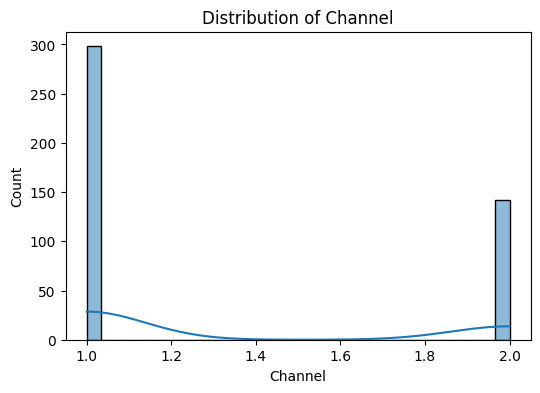

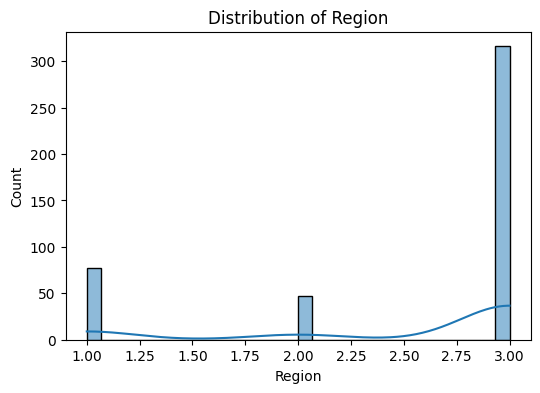

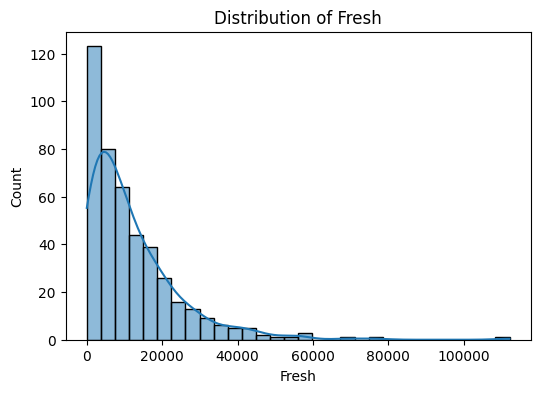

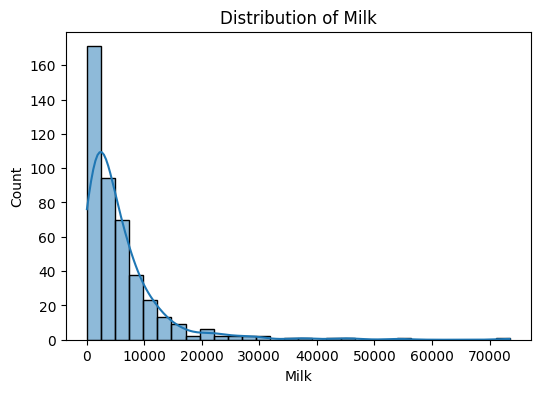

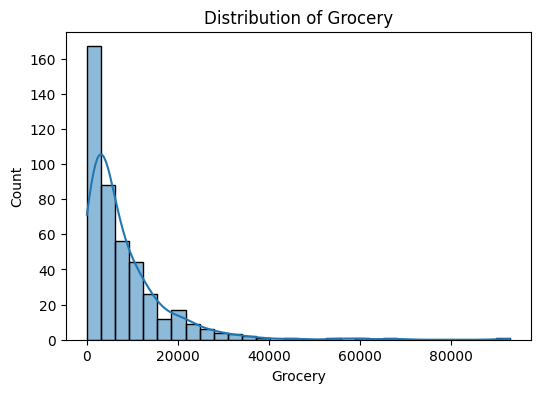

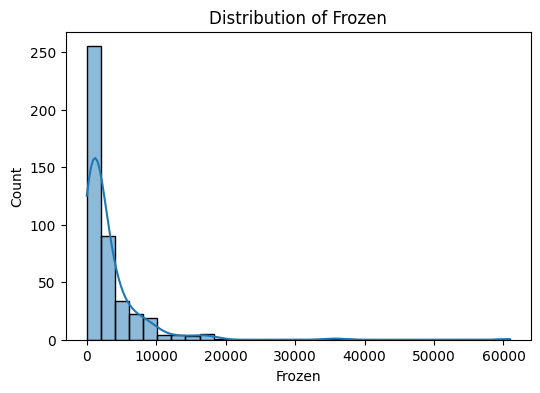

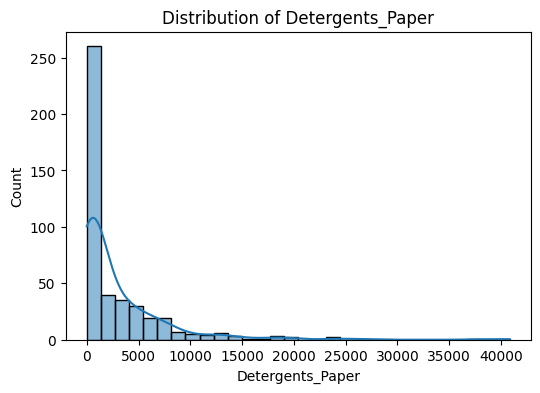

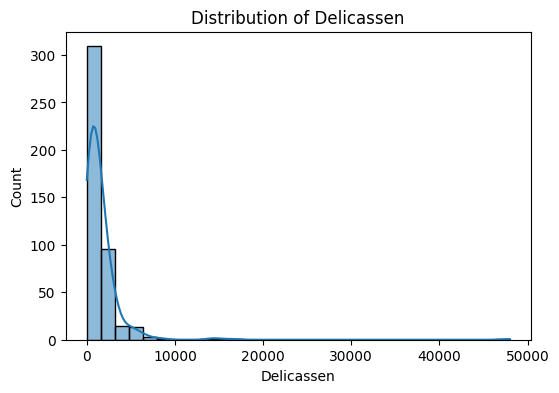

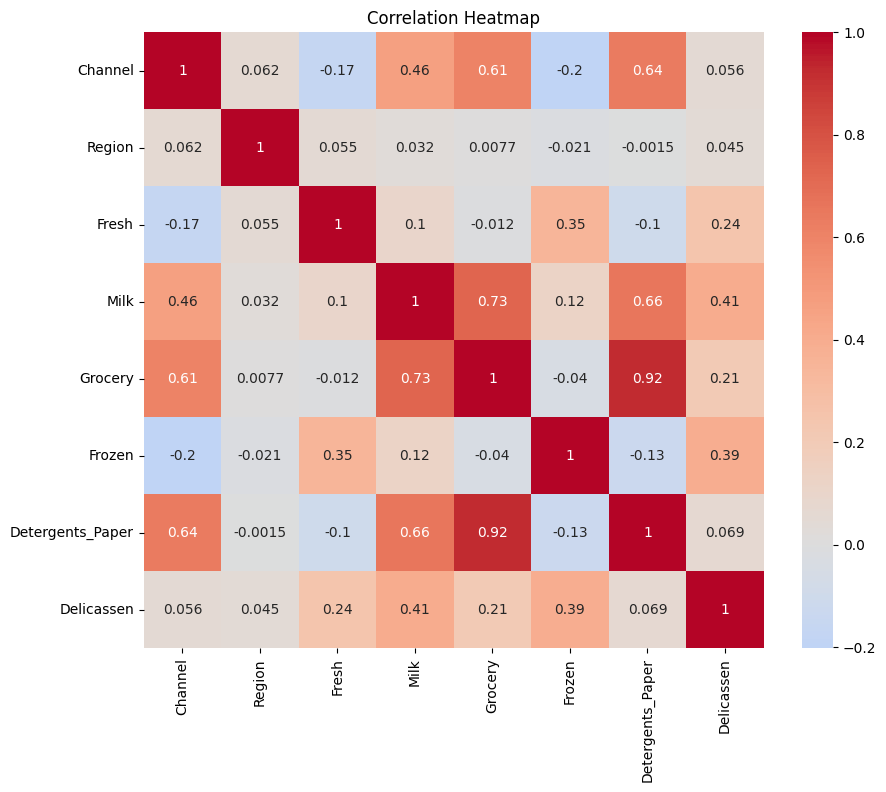

In [ ]:
# Distribution plots for each feature
for column in df.columns:
     plt.figure(figsize=(6, 4))
     sns.histplot(df[column], bins=30, kde=True)
     plt.title(f'Distribution of {column}')
     plt.show()
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


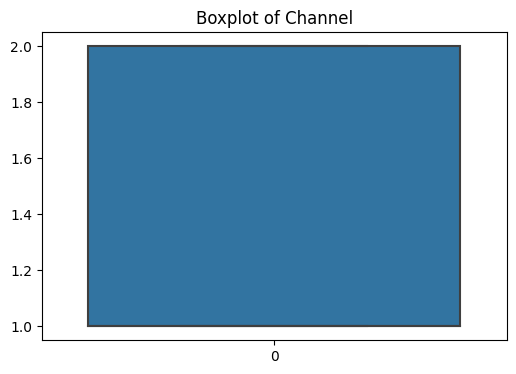

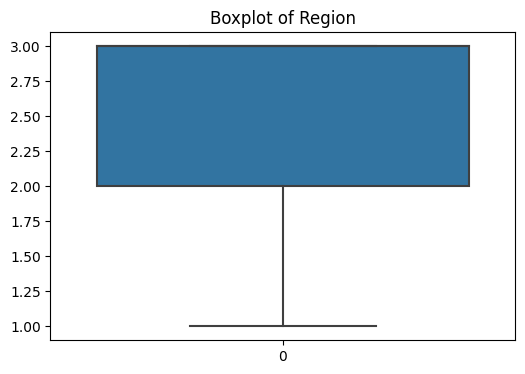

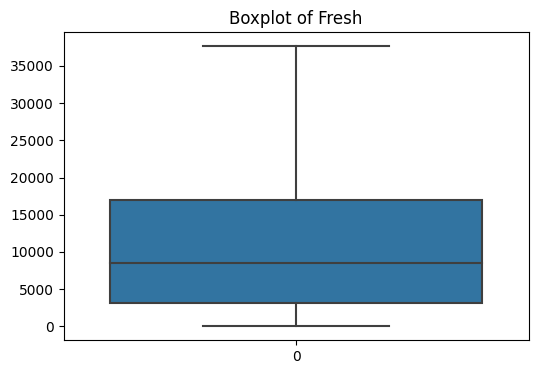

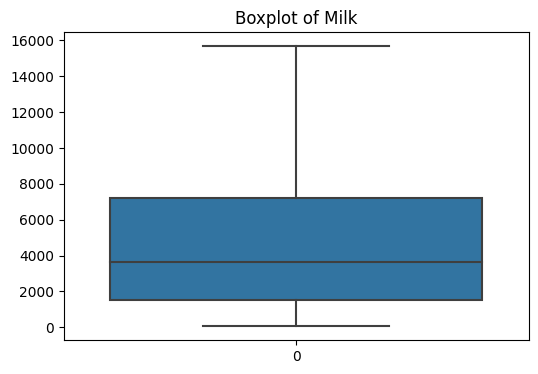

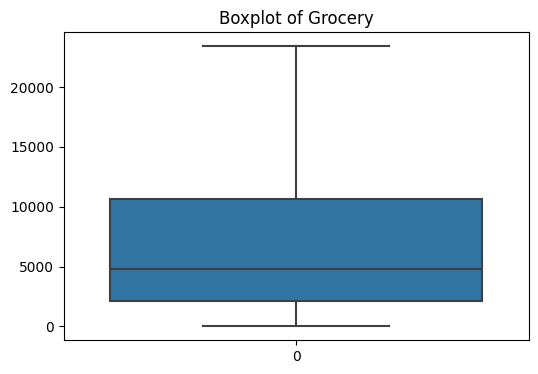

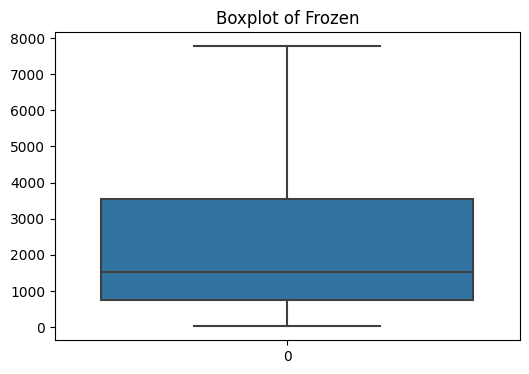

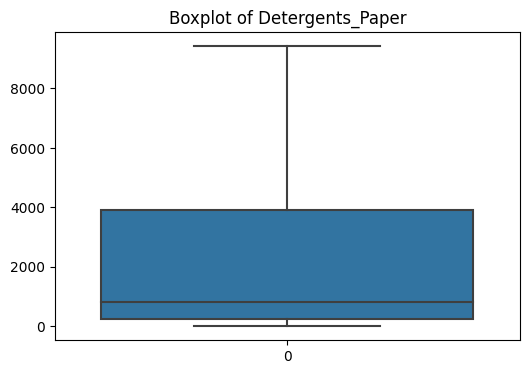

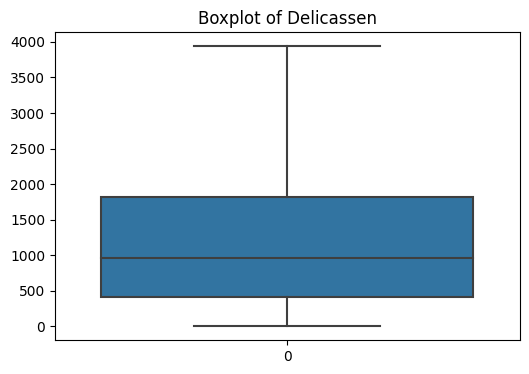

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0


In [ ]:
# checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
# Draw boxplots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
# Function to detect outliers
def detect_outliers(dataframe, column):
     Q1 = dataframe[column].quantile(0.25)
     Q3 = dataframe[column].quantile(0.75)
     IQR = Q3 - Q1
     outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR)|(dataframe[column] > Q3 + 1.5*IQR)]
     return outliers
# Detect and print number of outliers for each feature
for column in df.columns:
     outliers = detect_outliers(df, column)
     print(f'Number of outliers in {column}: {len(outliers)}')


In [ ]:
def handle_outliers(dataframe, column):
   Q1 = dataframe[column].quantile(0.25)
   Q3 = dataframe[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_limit = Q1 - 1.5*IQR
   upper_limit = Q3 + 1.5*IQR
   dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
# Handle outliers for each feature
for column in df.columns:
    handle_outliers(df, column)

In [ ]:
 # Import necessary libraries
import seaborn as sns

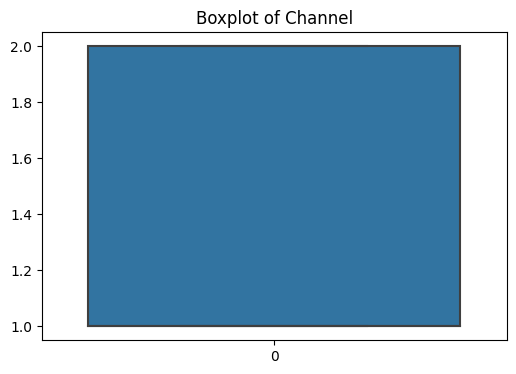

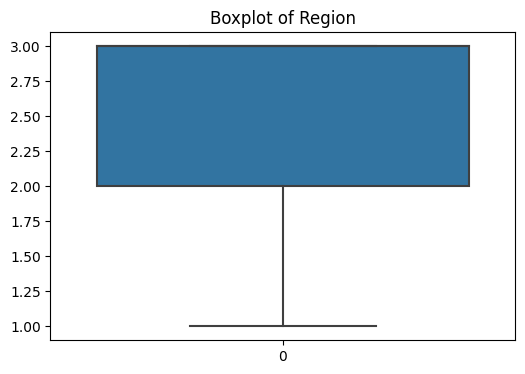

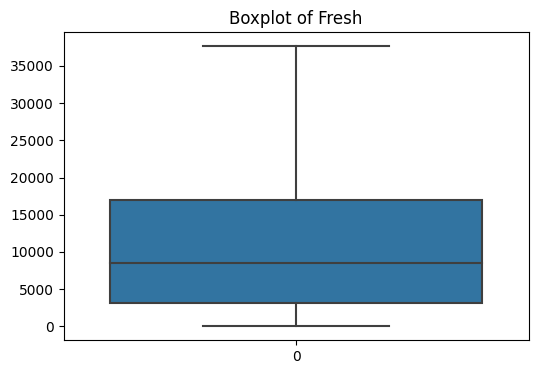

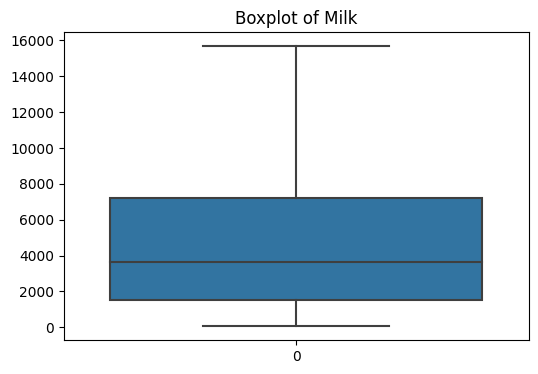

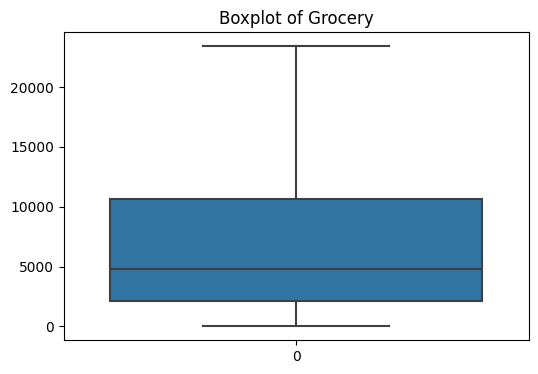

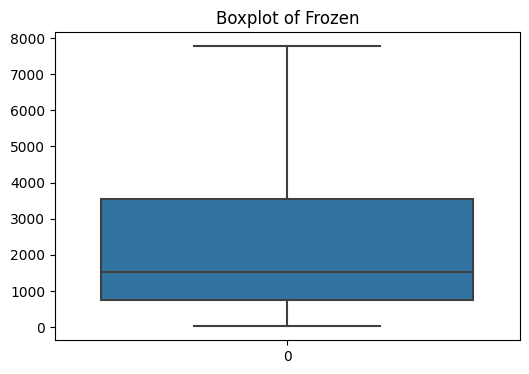

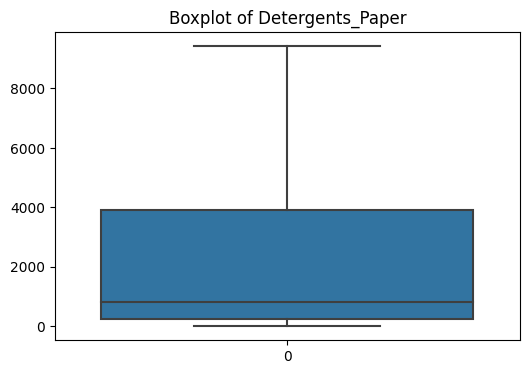

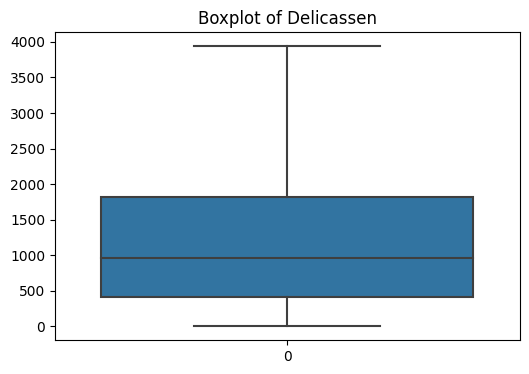

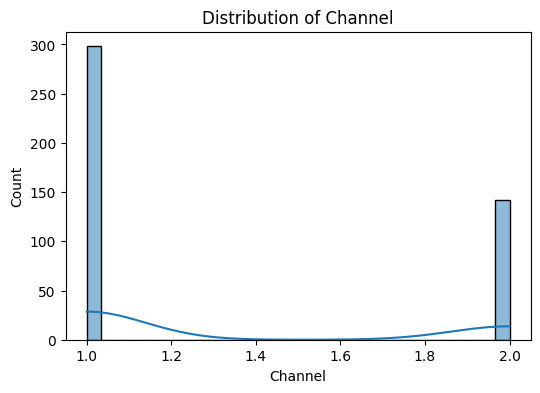

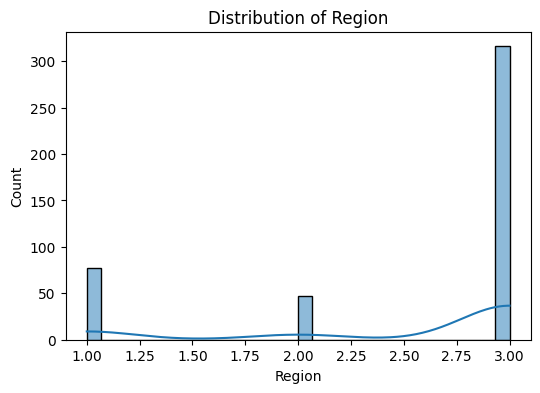

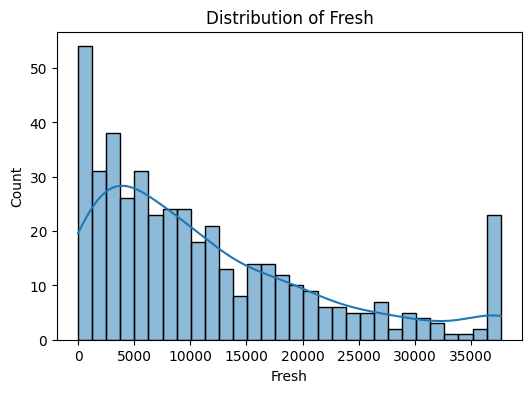

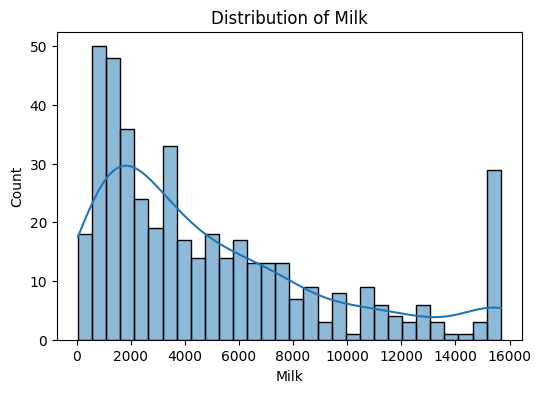

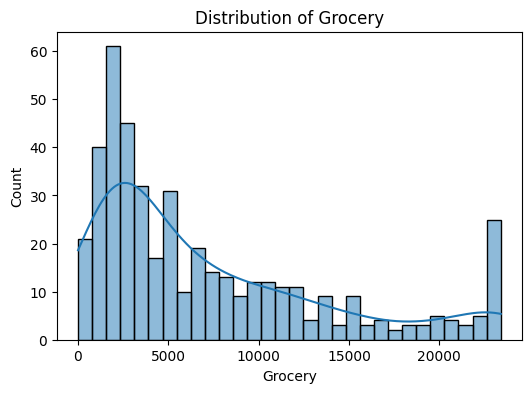

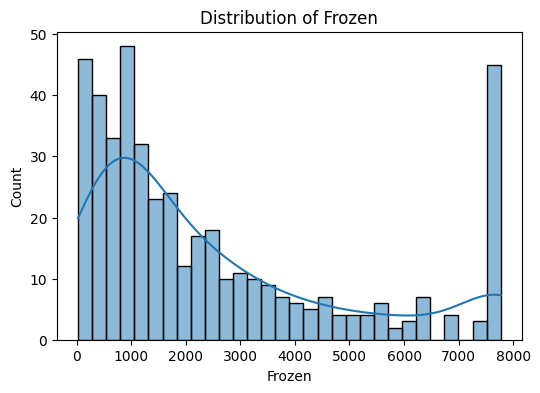

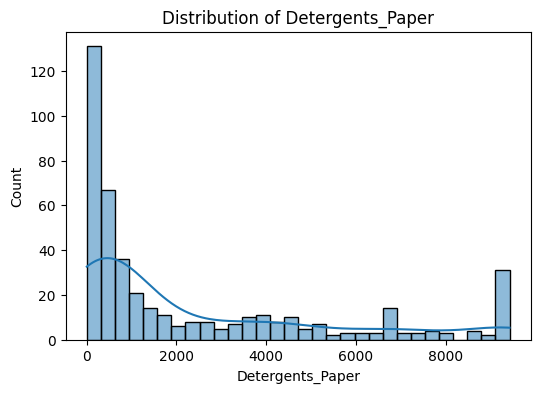

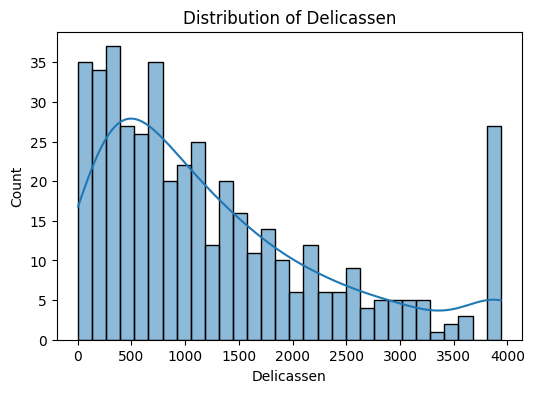

In [ ]:
import matplotlib.pyplot as plt
# Draw boxplots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
# Draw distribution plots for all features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Function to detect outliers
def detect_outliers(dataframe, column):
          Q1 = dataframe[column].quantile(0.25)
          Q3 = dataframe[column].quantile(0.75)
          IQR = Q3 - Q1
          outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR)|(dataframe[column] > Q3 + 1.5*IQR)]
          return outliers
# Detect and print number of outliers for each feature
for column in df.columns:
          outliers = detect_outliers(df, column)
          print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0


Descriptive Statistics:
          Channel      Region         Fresh          Milk      Grocery  \
count  440.000000  440.000000    440.000000    440.000000    440.00000   
mean     1.322727    2.543182  11357.568182   5048.592045   7236.37500   
std      0.468052    0.774272  10211.542235   4386.377073   6596.53308   
min      1.000000    1.000000      3.000000     55.000000      3.00000   
25%      1.000000    2.000000   3127.750000   1533.000000   2153.00000   
50%      1.000000    3.000000   8504.000000   3627.000000   4755.50000   
75%      2.000000    3.000000  16933.750000   7190.250000  10655.75000   
max      2.000000    3.000000  37642.750000  15676.125000  23409.87500   

            Frozen  Detergents_Paper   Delicassen  
count   440.000000        440.000000   440.000000  
mean   2507.085795       2392.616477  1266.715341  
std    2408.297738       2940.794090  1083.069792  
min      25.000000          3.000000     3.000000  
25%     742.250000        256.750000   408.250000

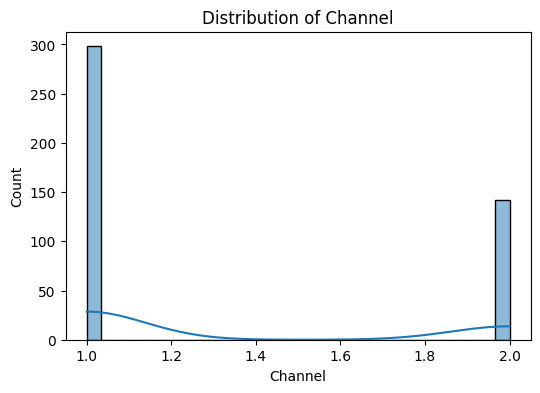

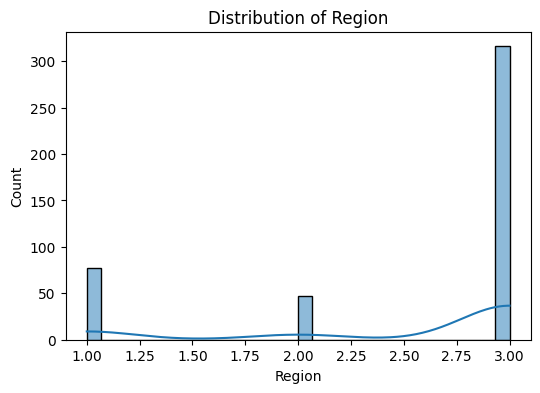

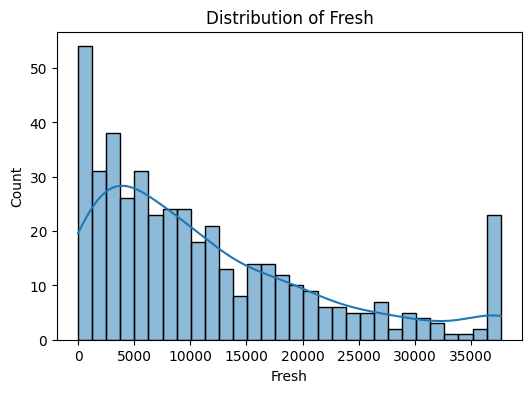

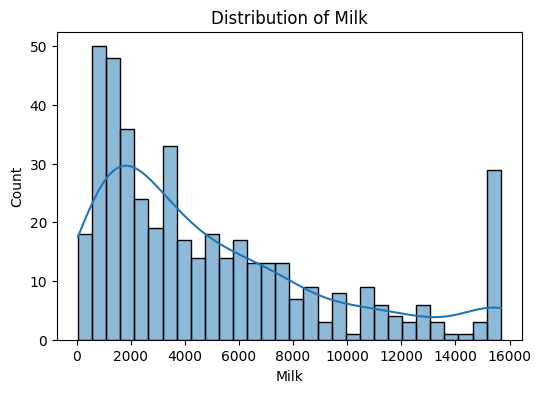

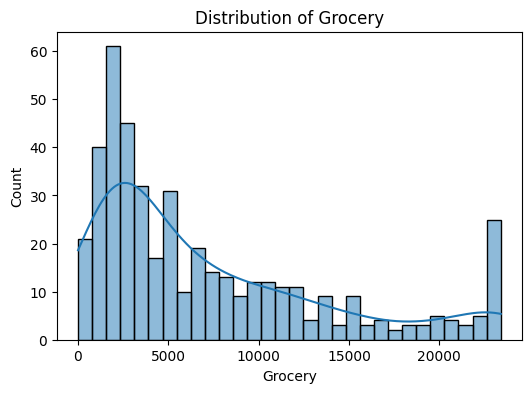

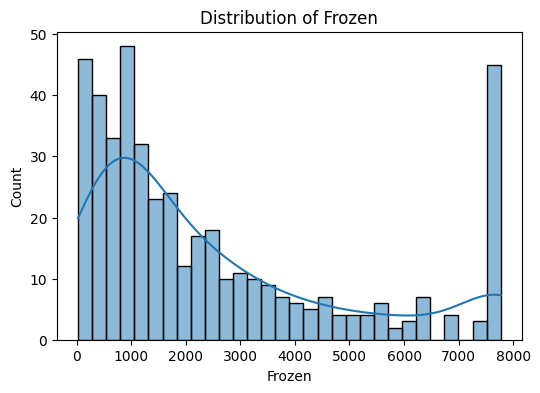

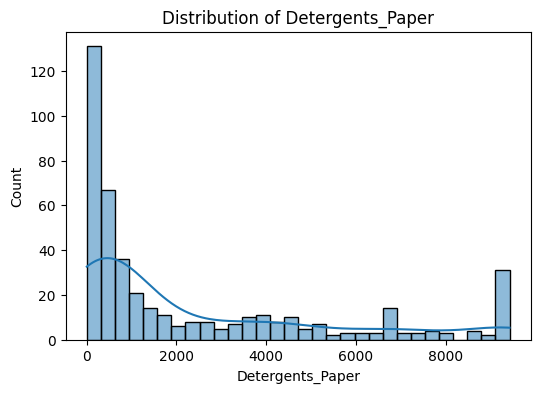

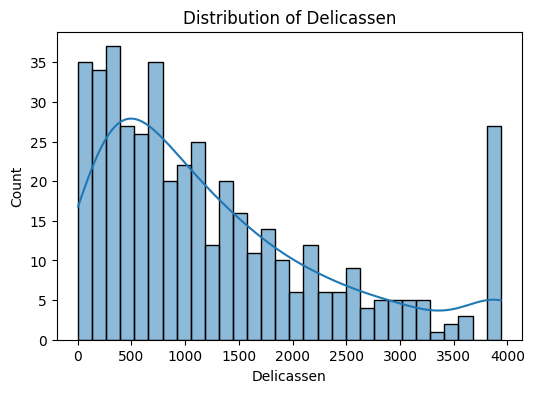

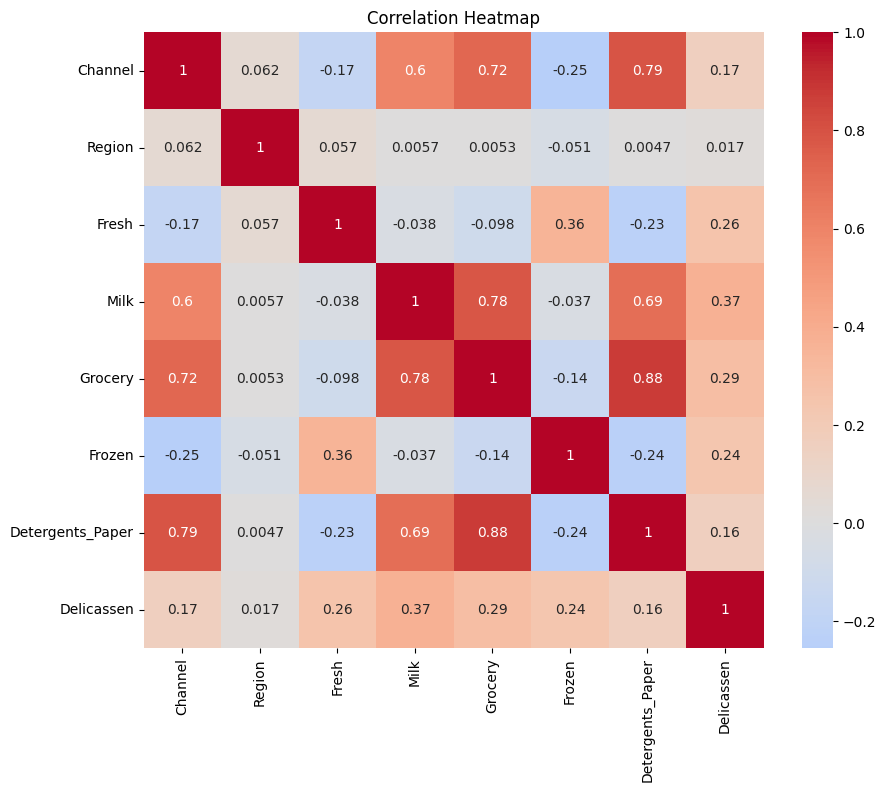

In [ ]:
# Check descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
# Check for duplicates
print("Number of duplicate rows: ", df.duplicated().sum())
# Distribution plots for each feature
for column in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 15
for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

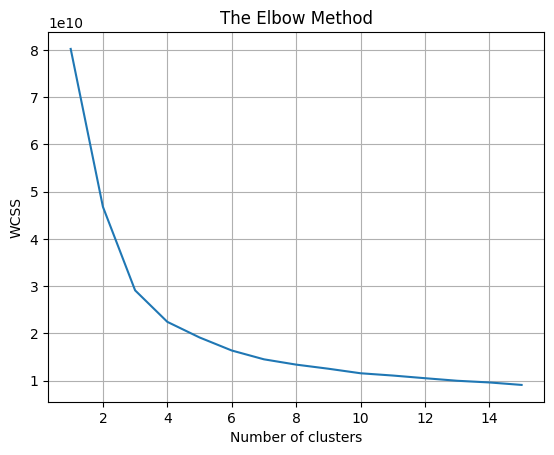

In [ ]:
# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
# Build the model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)
# Get cluster labels
cluster_labels = kmeans.labels_
# Add cluster labels to your original dataframe
df['Cluster'] = cluster_labels
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Channel  Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669.0  9656.0   7561.0   214.0            2674.0   
1        2       3   7057.0  9810.0   9568.0  1762.0            3293.0   
2        2       3   6353.0  8808.0   7684.0  2405.0            3516.0   
3        1       3  13265.0  1196.0   4221.0  6404.0             507.0   
4        2       3  22615.0  5410.0   7198.0  3915.0            1777.0   

   Delicassen  Cluster  
0     1338.00        0  
1     1776.00        2  
2     3938.25        0  
3     1788.00        0  
4     3938.25        1  


In [ ]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
# Check the size of each cluster
print("Cluster Sizes:\n", df['Cluster'].value_counts())
# Check the characteristics of each cluster
for i in range(4):
          print("\nCluster ", i)
          print(df[df['Cluster'] == i].describe())

Cluster Sizes:
 0    227
1    112
2    101
Name: Cluster, dtype: int64

Cluster  0
          Channel      Region         Fresh          Milk       Grocery  \
count  227.000000  227.000000    227.000000    227.000000    227.000000   
mean     1.132159    2.528634   6880.828194   3004.604626   3603.237885   
std      0.339412    0.788647   4497.653118   2608.249620   2498.211340   
min      1.000000    1.000000      3.000000     55.000000    137.000000   
25%      1.000000    2.000000   2929.000000   1070.500000   1666.000000   
50%      1.000000    3.000000   6758.000000   2160.000000   2824.000000   
75%      1.000000    3.000000  10334.500000   3965.500000   5163.500000   
max      2.000000    3.000000  16260.000000  15676.125000  11593.000000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   227.000000        227.000000   227.000000    227.0  
mean   2326.412996        984.233480   963.896476      0.0  
std    2264.692928       1235.547191   893.981219      0.0

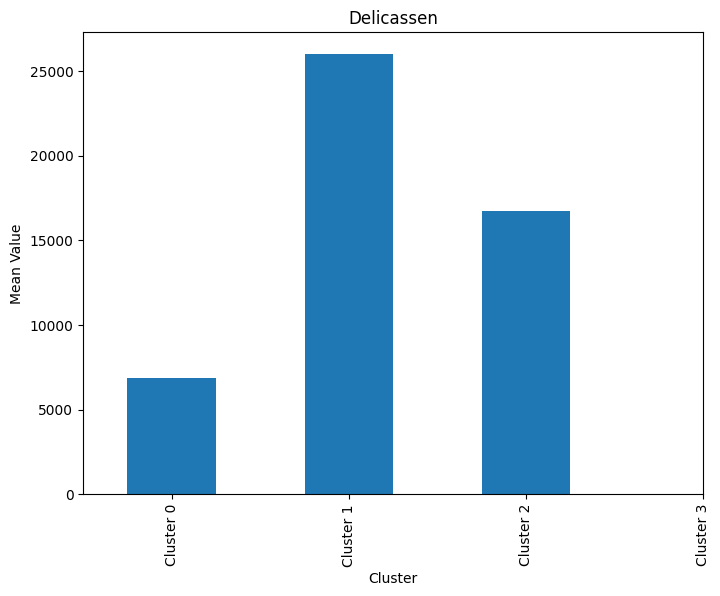

In [ ]:
# Calculate the mean values for each feature per cluster
cluster_means = df.groupby('Cluster').mean()
# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()
# Create bar plot for each feature
for feature in cluster_means.index:
            cluster_means.loc[feature].plot(kind='bar', figsize=(8,6))
            plt.title(feature)
            plt.ylabel('Mean Value')
            plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'])

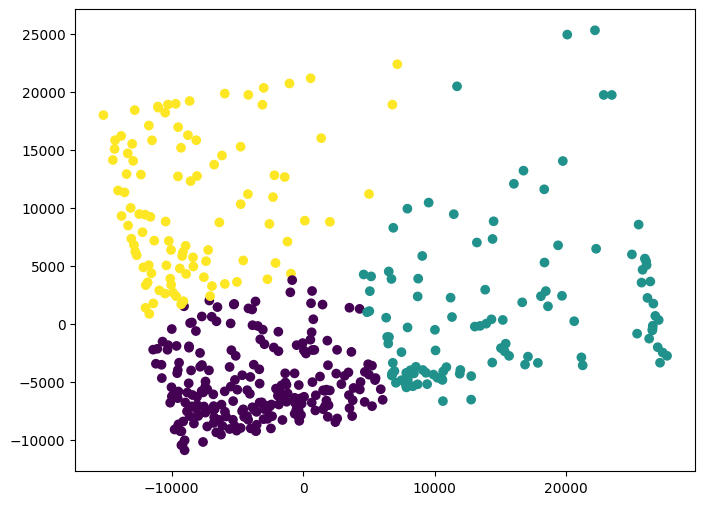

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))
# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df['Cluster']
# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
